In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [ ]:
data_dir = '/kaggle/input/bike-sharing-demand/'

df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_sample = pd.read_csv('/content/sampleSubmission.csv')

In [ ]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
df_sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
df_all = pd.concat([df_train,df_test], sort = False)

# datetime
df_all['datetime']=pd.to_datetime(df_all['datetime'])
# year
df_all['year'] = df_all['datetime'].dt.year
# hour
df_all['hour'] = df_all['datetime'].dt.hour
# dayofweek
df_all['dayofweek'] = df_all['datetime'].dt.dayofweek

df_train = df_all[:len(df_train)]
df_test = df_all[len(df_train):]

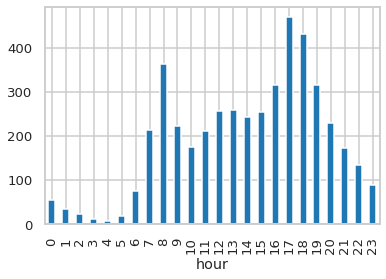

In [ ]:
time_group = df_train.groupby(['hour'])['count'].mean()
time_group.plot.bar()

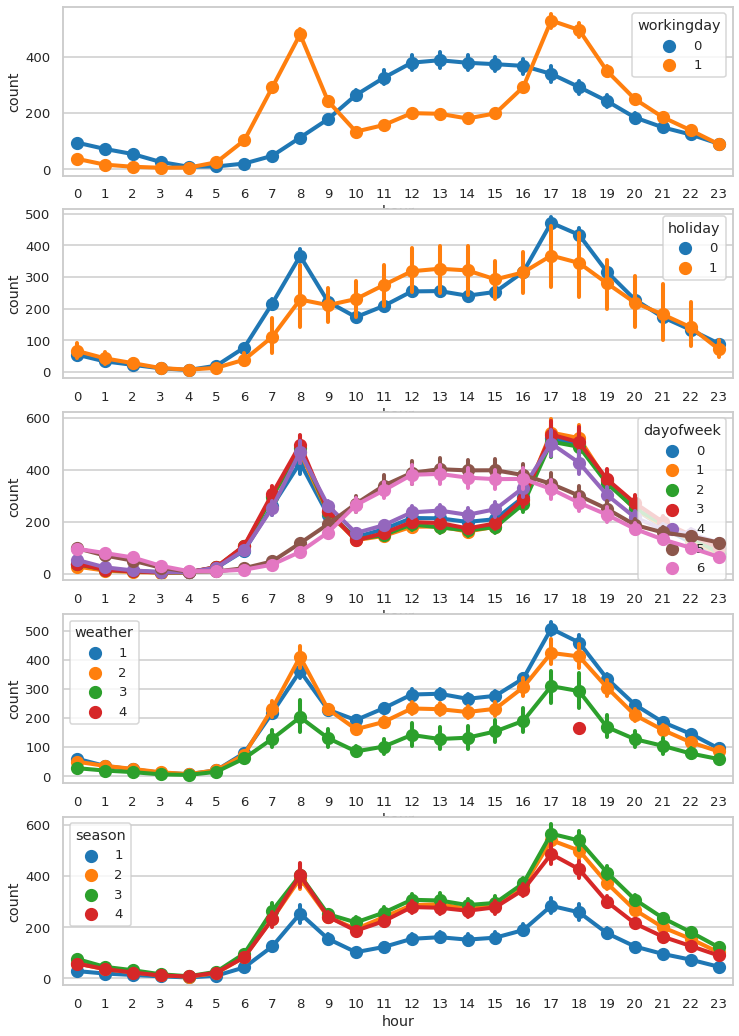

In [ ]:
import matplotlib as mpl
mpl.rc('font', size=11)
figure, axes= plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

sns.pointplot(x='hour', y='count', data=df_train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=df_train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=df_train, hue='dayofweek', ax=axes[2])
sns.pointplot(x='hour', y='count', data=df_train, hue='weather', ax=axes[3])
sns.pointplot(x='hour', y='count', data=df_train, hue='season', ax=axes[4])

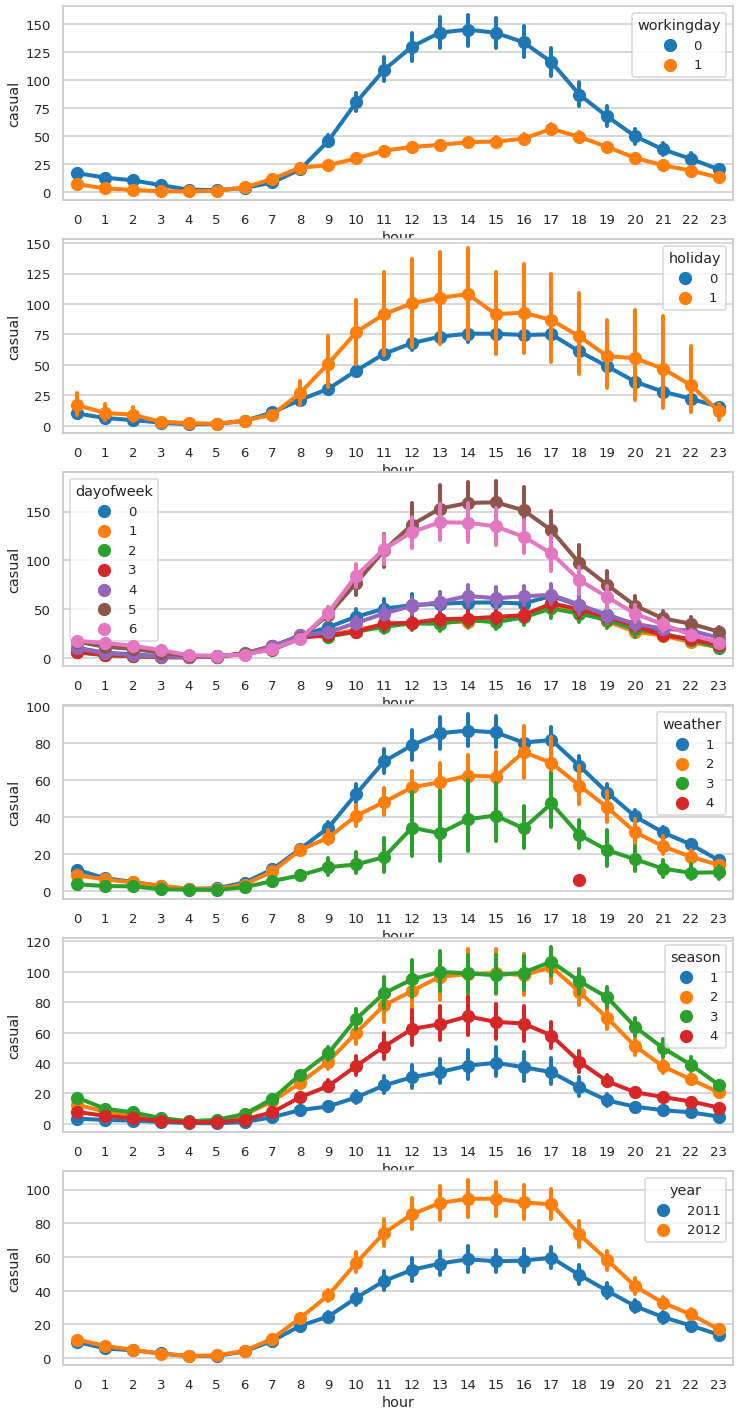

In [ ]:
import matplotlib as mpl
mpl.rc('font', size=11)
figure, axes= plt.subplots(nrows=6)
figure.set_size_inches(12, 25)

sns.pointplot(x='hour', y='casual', data=df_train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='casual', data=df_train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='casual', data=df_train, hue='dayofweek', ax=axes[2])
sns.pointplot(x='hour', y='casual', data=df_train, hue='weather', ax=axes[3])
sns.pointplot(x='hour', y='casual', data=df_train, hue='season', ax=axes[4])
sns.pointplot(x='hour', y='casual', data=df_train, hue='year', ax=axes[5])

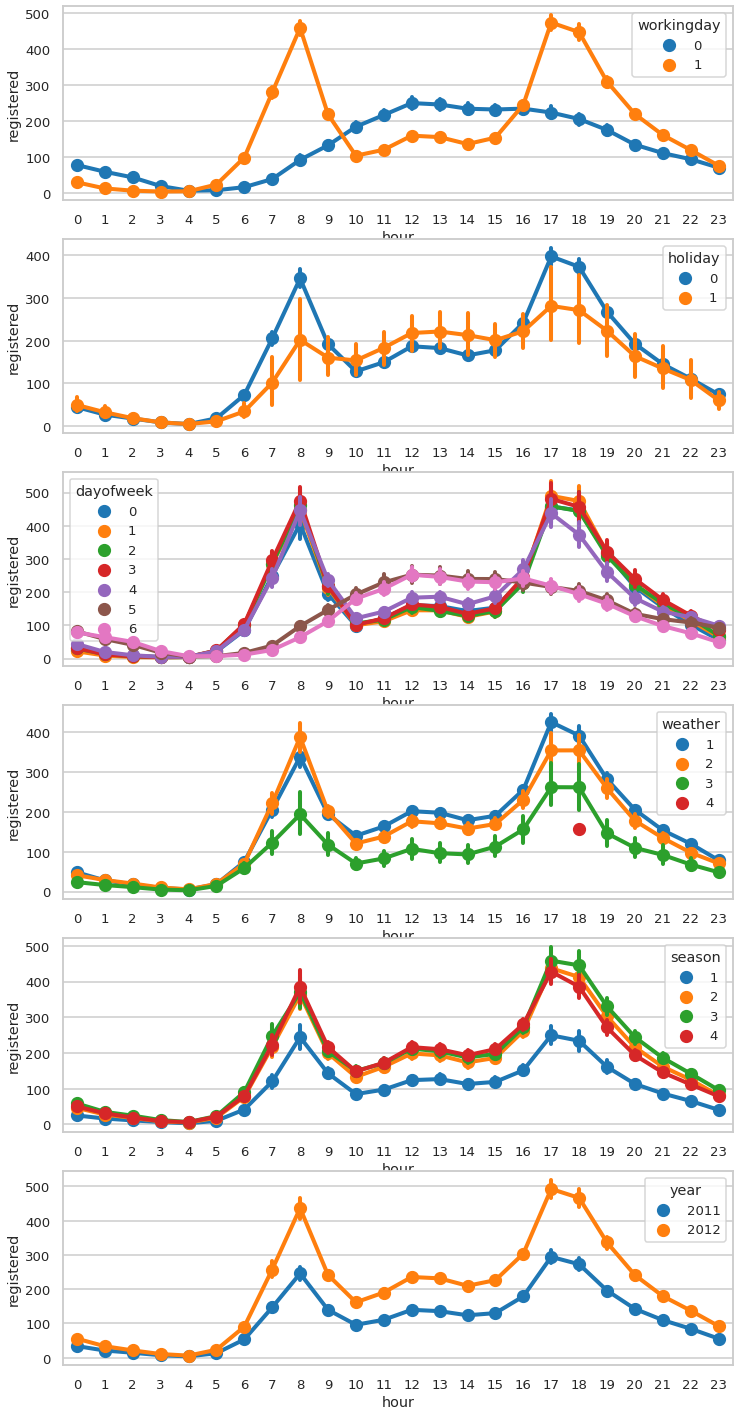

In [ ]:
import matplotlib as mpl
mpl.rc('font', size=11)
figure, axes= plt.subplots(nrows=6)
figure.set_size_inches(12, 25)

sns.pointplot(x='hour', y='registered', data=df_train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='registered', data=df_train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='registered', data=df_train, hue='dayofweek', ax=axes[2])
sns.pointplot(x='hour', y='registered', data=df_train, hue='weather', ax=axes[3])
sns.pointplot(x='hour', y='registered', data=df_train, hue='season', ax=axes[4])
sns.pointplot(x='hour', y='registered', data=df_train, hue='year', ax=axes[5])

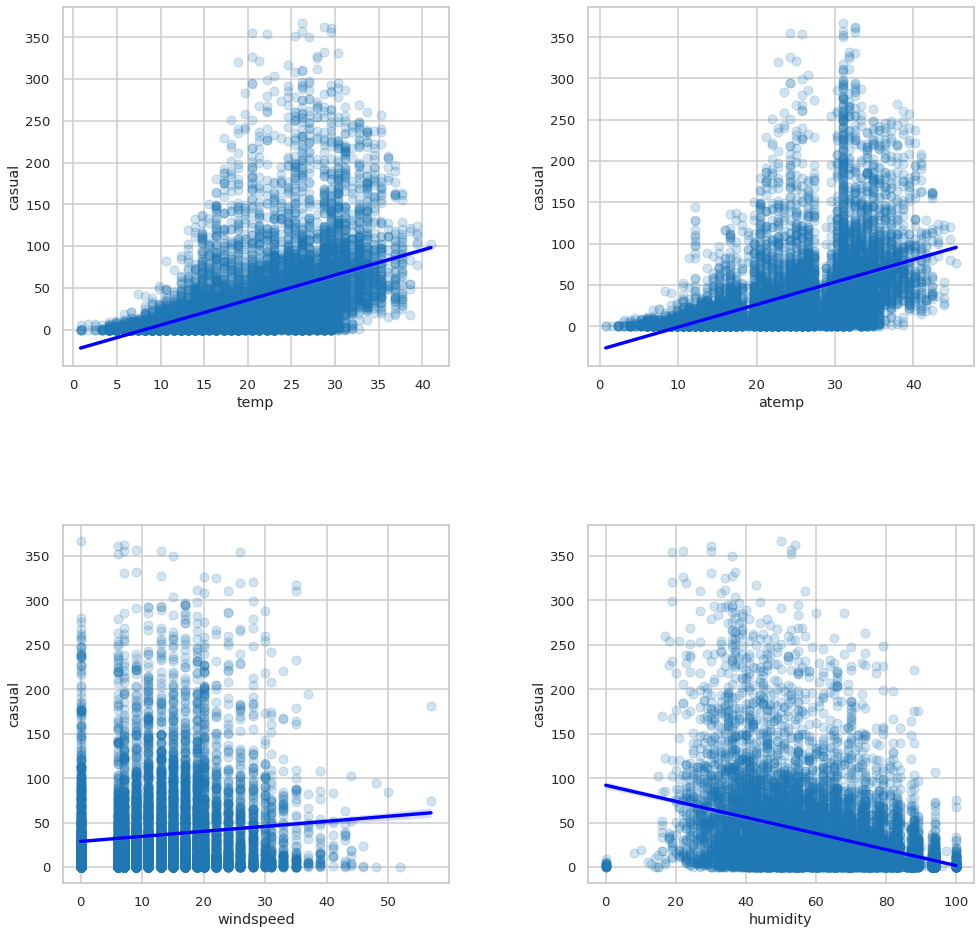

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(15, 15)

sns.regplot(x='temp', y='casual', data=df_train, ax=axes[0,0],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='atemp', y='casual', data=df_train, ax=axes[0,1],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='windspeed', y='casual', data=df_train, ax=axes[1,0],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='humidity', y='casual', data=df_train, ax=axes[1,1],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'});

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(15, 15)

sns.regplot(x='temp', y='registered', data=df_train, ax=axes[0,0],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='atemp', y='registered', data=df_train, ax=axes[0,1],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='windspeed', y='registered', data=df_train, ax=axes[1,0],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x='humidity', y='registered', data=df_train, ax=axes[1,1],
           scatter_kws={'alpha':0.2}, line_kws={'color':'blue'});

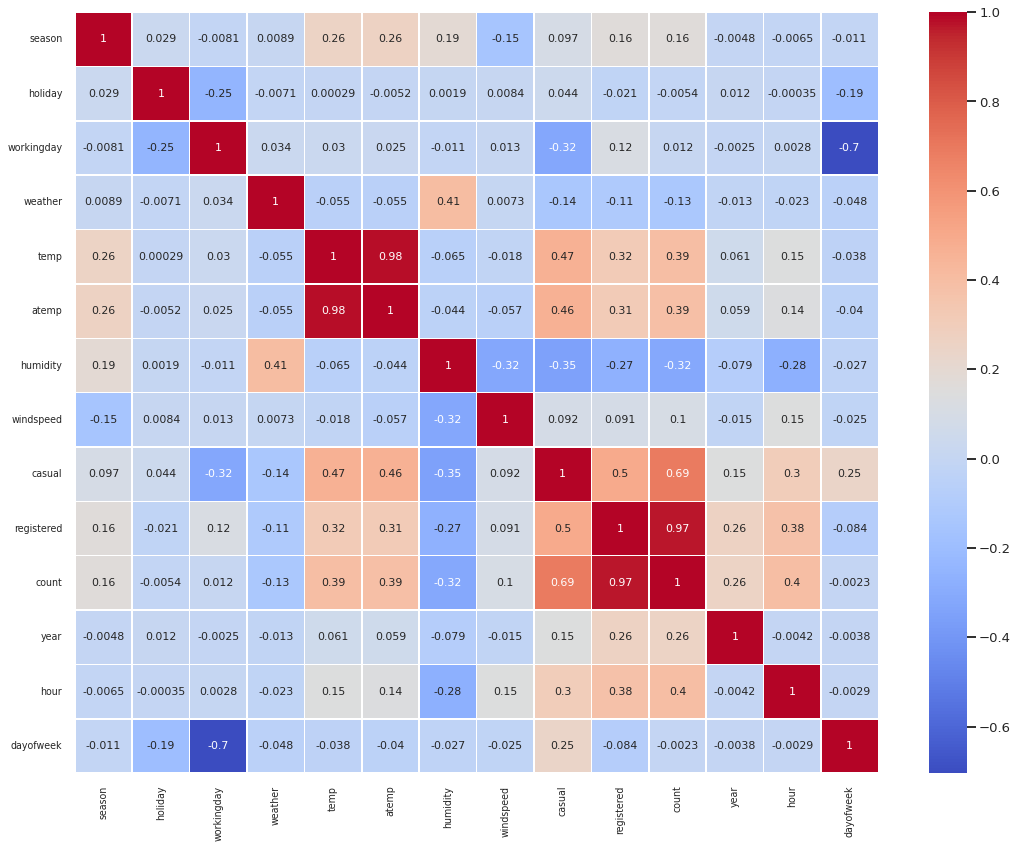

In [ ]:
plt.figure(figsize=(18,14))
corr = df_train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=.5, cmap='coolwarm', annot=True)
plt.xticks(fontsize=9.5)
plt.yticks(fontsize=9.5)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

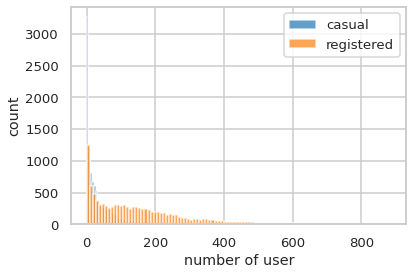

In [ ]:
plt.hist(df_train['casual'],bins=70,alpha=0.7,label='casual')
plt.hist(df_train['registered'],bins=100,alpha=0.7,label='registered')
plt.xlabel('number of user')
plt.ylabel('count')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

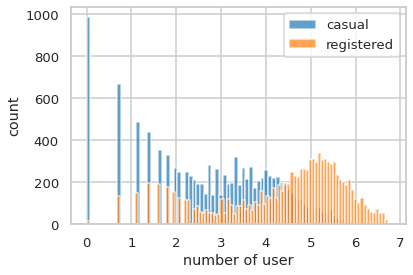

In [ ]:
plt.hist(np.log1p(df_train['casual']),bins=70,alpha=0.7,label='casual')
plt.hist(np.log1p(df_train['registered']),bins=100,alpha=0.7,label='registered')
plt.xlabel('number of user')
plt.ylabel('count')
plt.legend()
plt.show

In [ ]:
df_all = pd.concat([df_train,df_test], sort = False)

df_all['commutingtime'] = (((df_all['hour'] >= 7) & (df_all['hour'] <= 9)) |((df_all['hour'] >= 16) & (df_all['hour'] <= 20))) & (df_all['workingday'] == 1)
df_all['workingtime'] = ((df_all['hour'] >= 10) & (df_all['hour'] <= 15)) & (df_all['workingday'] == 1)
df_all['daytime'] = (df_all['datetime'].dt.hour >= 9) & (df_all['datetime'].dt.hour <= 19)
df_all['midnight'] = ((df_all['datetime'].dt.hour >= 0) & (df_all['datetime'].dt.hour <= 6)) | (df_all['datetime'].dt.hour == 23)

df_all = pd.get_dummies(df_all, columns=['season', 'weather', 'year', 'hour'])

drop_columns = ['datetime','year_2011', 'atemp']
df_all.drop(drop_columns,axis=1, inplace=True)

df_train = df_all[:len(df_train)]
df_test = df_all[len(df_train):]

In [ ]:
# casual
y_data_train_casual = np.log1p(df_train['casual'])
# registered
y_data_train_registered = np.log1p(df_train['registered'])

# casual
drop_columns = ['count','casual','registered','commutingtime']
x_data_train_casual = df_train.drop(drop_columns,axis=1)

x_data_test_casual = df_test.drop(drop_columns,axis=1)

drop_columns = ['count','casual','registered']

x_data_train_registered = df_train.drop(drop_columns,axis=1)

x_data_test_registered = df_test.drop(drop_columns,axis=1)

In [ ]:
clf1 = RandomForestRegressor(n_estimators=100,max_depth=30,random_state=0)
clf2 = RandomForestRegressor(n_estimators=100,max_depth=30,random_state=0)

clf1.fit(x_data_train_casual,y_data_train_casual)
clf2.fit(x_data_train_registered,y_data_train_registered)

y_data_pred_casual = clf1.predict(x_data_test_casual)
y_data_pred_registered = clf2.predict(x_data_test_registered)

y_data_pred = np.expm1(y_data_pred_casual) + np.expm1(y_data_pred_registered)
print(y_data_pred[100])

86.08461073334628


In [ ]:
y_data_pred[y_data_pred < 0] = 0
submit = df_sample
submit['count'] = list(map(int,y_data_pred))
submit.to_csv('output.csv',index = False)

In [ ]:
submit

,datetime,count
0,2011-01-20 00:00:00,12
1,2011-01-20 01:00:00,4
2,2011-01-20 02:00:00,2
3,2011-01-20 03:00:00,2
4,2011-01-20 04:00:00,1
...,...,...
6488,2012-12-31 19:00:00,231
6489,2012-12-31 20:00:00,175
6490,2012-12-31 21:00:00,101
6491,2012-12-31 22:00:00,92


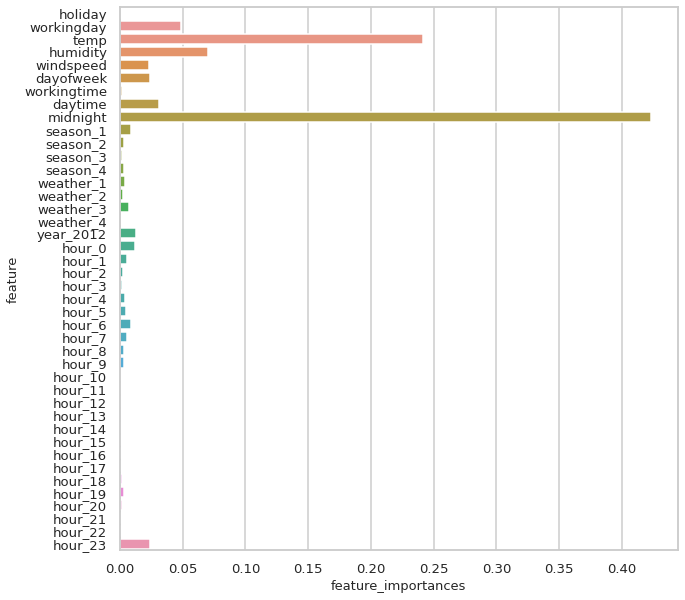

In [ ]:
import matplotlib as mpl

figure, axes= plt.subplots(figsize=(10,10))
plt.xlabel('feature_importances',fontsize=13)
plt.ylabel('feature',fontsize=13)
sns.barplot(
    y = x_data_train_casual.keys(),
    x = clf1.feature_importances_
)

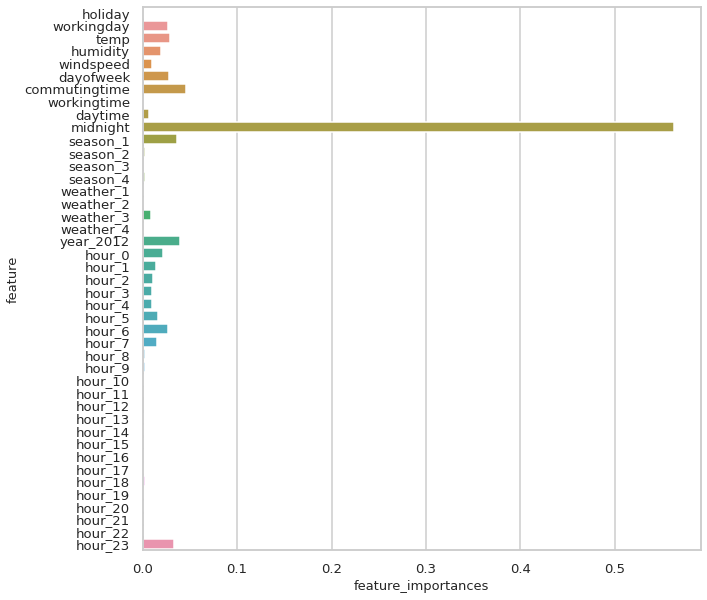

In [ ]:
figure, axes= plt.subplots(figsize=(10,10))
plt.xlabel('feature_importances',fontsize=13)
plt.ylabel('feature',fontsize=13)
sns.barplot(
    y = x_data_train_registered.keys(),
    x = clf2.feature_importances_
)